# By Shyamal Krishna Agrawal
# The Sparks Foundation
## Data Science & Business Analytics Intern
### Task 8: Spread of Covid-19 cases in Asia, Europe, BRICS etc
###### Data Source: https://bit.ly/30d2gdi
###### Problem Statement : Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59930 entries, 0 to 59929
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               59588 non-null  object 
 1   continent                              59230 non-null  object 
 2   location                               59930 non-null  object 
 3   date                                   59930 non-null  object 
 4   total_cases                            59345 non-null  float64
 5   new_cases                              59338 non-null  float64
 6   new_cases_smoothed                     58383 non-null  float64
 7   total_deaths                           50923 non-null  float64
 8   new_deaths                             50922 non-null  float64
 9   new_deaths_smoothed                    58383 non-null  float64
 10  total_cases_per_million                59003 non-null  float64
 11  ne

In [ ]:
df.shape

(59930, 55)

In [ ]:
df.isnull().sum()

iso_code                                   342
continent                                  700
location                                     0
date                                         0
total_cases                                585
new_cases                                  592
new_cases_smoothed                        1547
total_deaths                              9007
new_deaths                                9008
new_deaths_smoothed                       1547
total_cases_per_million                    927
new_cases_per_million                      934
new_cases_smoothed_per_million            1884
total_deaths_per_million                  9336
new_deaths_per_million                    9337
new_deaths_smoothed_per_million           1884
reproduction_rate                        12799
icu_patients                             53801
icu_patients_per_million                 53801
hosp_patients                            53063
hosp_patients_per_million                53063
weekly_icu_ad

In [ ]:
#Coping data to another variable without World and International column
data=df[df['date']=='2020-11-15']
data = data[~data['location'].isin(['World','International'])]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,1110.759,5.266,3.967,41.615,0.308,0.202,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
576,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,9670.582,207.450,179.899,216.485,3.822,3.177,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
900,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,1543.384,19.612,18.335,49.121,0.342,0.345,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1218,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,75998.188,1902.543,904.124,983.628,12.942,1.849,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1518,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,409.265,2.343,4.425,9.797,0.000,0.065,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58274,VEN,South America,Venezuela,2020-11-15,97352.0,419.0,352.714,851.0,3.0,3.571,3423.554,14.735,12.404,29.927,0.106,0.126,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.96,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.761
58631,VNM,Asia,Vietnam,2020-11-15,1281.0,16.0,9.714,35.0,0.0,0.000,13.160,0.164,0.100,0.360,0.000,0.000,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.06,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.694
59268,YEM,Asia,Yemen,2020-11-15,2072.0,0.0,0.286,605.0,0.0,0.429,69.470,0.000,0.010,20.284,0.000,0.014,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.452
59570,ZMB,Africa,Zambia,2020-11-15,17123.0,26.0,24.143,353.0,3.0,0.571,931.410,1.414,1.313,19.202,0.163,0.031,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4042.0,327832.0,17.833,0.220,4262.0,0.232,0.006,176.5,tests performed,NaN,NaN,NaN,NaN,NaN,45.37,18383956.0,22.995,17.7,2.480,1.542,3689.2

In [ ]:
fig = p.choropleth(data, locations="iso_code", 
                    color="total_deaths", 
                    hover_name='location',
                    color_continuous_scale="reds", 
                    title='Total Covid19 deaths in World')
fig.show()

In [ ]:
fig= p.choropleth(data,locations = "iso_code",
                 color ="total_cases",
                 hover_name= "location",
                 color_continuous_scale ="blues",
                 title = "Total COVID-19 Cases in the World")
fig.show()

In [ ]:
top_10_countries_by_new_cases = data.sort_values("new_cases",ascending= False)
top_10_countries_by_new_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56977,USA,North America,United States,2020-11-15,11127140.0,136458.0,150925.571,246656.0,646.0,1109.000,33616.468,412.257,455.965,745.178,1.952,3.350,1.20,13849.0,41.840,70202.0,212.089,1450.000,4.381,22098.000,66.761,1168782.0,172921046.0,522.416,3.531,1529400.0,4.621,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,65.28,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
26791,ITA,Europe,Italy,2020-11-15,1178529.0,33977.0,34775.000,45229.0,546.0,547.857,19492.117,561.958,575.156,748.059,9.030,9.061,1.06,3422.0,56.598,35469.0,586.635,NaN,NaN,16756.346,277.139,195275.0,18878386.0,312.236,3.230,214810.0,3.553,0.162,6.2,tests performed,NaN,NaN,NaN,NaN,NaN,79.63,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
24452,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6409.492,22.136,30.173,94.253,0.315,0.358,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,805589.0,124836819.0,90.461,0.584,1014290.0,0.735,0.041,24.4,samples tested,NaN,NaN,NaN,NaN,NaN,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
19321,FRA,Europe,France,2020-11-15,2033419.0,27192.0,28040.714,44613.0,303.0,589.000,31152.284,416.586,429.588,683.478,4.642,9.024,0.86,4880.0,74.762,33050.0,506.331,2563.684,39.276,15632.436,239.491,26460.0,NaN,NaN,0.405,228818.0,3.506,0.108,9.3,people tested,NaN,NaN,NaN,NaN,NaN,78.70,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
56619,GBR,Europe,United Kingdom,2020-11-15,1372884.0,24977.0,25362.000,52026.0,168.0,413.143,20223.373,367.926,373.597,766.373,2.475,6.086,1.01,1397.0,20.579,16841.0,248.078,NaN,NaN,12399.000,182.644,283866.0,36260720.0,534.141,4.182,331285.0,4.880,0.077,13.1,tests performed,NaN,NaN,NaN,NaN,NaN,67.59,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47736,SLE,Africa,Sierra Leone,2020-11-15,2391.0,0.0,1.429,74.0,0.0,0.000,299.737,0.000,0.179,9.277,0.000,0.000,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.48,7.976985e+06,104.700,19.1,2.538,1.285,1390.300,52.2,325.721,2.42,8.8,41.3,19.275,NaN,54.70,0.419
11993,COM,Africa,Comoros,2020-11-15,579.0,0.0,2.286,7.0,0.0,0.000,665.827,0.000,2.628,8.050,0.000,0.000,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.695950e+05,437.352,20.4,2.963,1.726,1413.890,18.1,261.516,11.88,4.4,23.6,15.574,2.20,64.32,0.503
48848,SLB,Oceania,Solomon Islands,2020-11-15,16.0,0.0,0.429,NaN,NaN,0.000,23.294,0.000,0.624,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
top_10_countries_by_most_deaths = data.sort_values("total_deaths",ascending =False)
top_10_countries_by_most_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56977,USA,North America,United States,2020-11-15,11127140.0,136458.0,150925.571,246656.0,646.0,1109.000,33616.468,412.257,455.965,745.178,1.952,3.350,1.20,13849.0,41.840,70202.0,212.089,1450.0,4.381,22098.0,66.761,1168782.0,172921046.0,522.416,3.531,1529400.0,4.621,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,65.28,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7587,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,27583.314,66.494,133.729,780.008,0.659,2.286,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
24452,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6409.492,22.136,30.173,94.253,0.315,0.358,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,805589.0,124836819.0,90.461,0.584,1014290.0,0.735,0.041,24.4,samples tested,NaN,NaN,NaN,NaN,NaN,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
35067,MEX,North America,Mexico,2020-11-15,1006522.0,3269.0,5528.143,98542.0,283.0,502.143,7806.566,25.354,42.876,764.290,2.195,3.895,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4646.0,2346822.0,18.202,0.036,14784.0,0.115,0.449,2.2,people tested,NaN,NaN,NaN,NaN,NaN,71.76,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
56619,GBR,Europe,United Kingdom,2020-11-15,1372884.0,24977.0,25362.000,52026.0,168.0,413.143,20223.373,367.926,373.597,766.373,2.475,6.086,1.01,1397.0,20.579,16841.0,248.078,NaN,NaN,12399.0,182.644,283866.0,36260720.0,534.141,4.182,331285.0,4.880,0.077,13.1,tests performed,NaN,NaN,NaN,NaN,NaN,67.59,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47447,SYC,Africa,Seychelles,2020-11-15,160.0,0.0,0.286,NaN,NaN,0.000,1627.008,0.000,2.905,NaN,NaN,0.000,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.48,9.834000e+04,208.354,36.2,8.606,5.586,26382.287,1.1,242.648,10.55,7.1,35.7,NaN,3.60,73.40,0.797
48848,SLB,Oceania,Solomon Islands,2020-11-15,16.0,0.0,0.429,NaN,NaN,0.000,23.294,0.000,0.624,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.40,73.00,0.546
54054,TLS,Asia,Timor,2020-11-15,30.0,0.0,0.000,NaN,NaN,0.000,22.754,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.93,1.318442e+06,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6

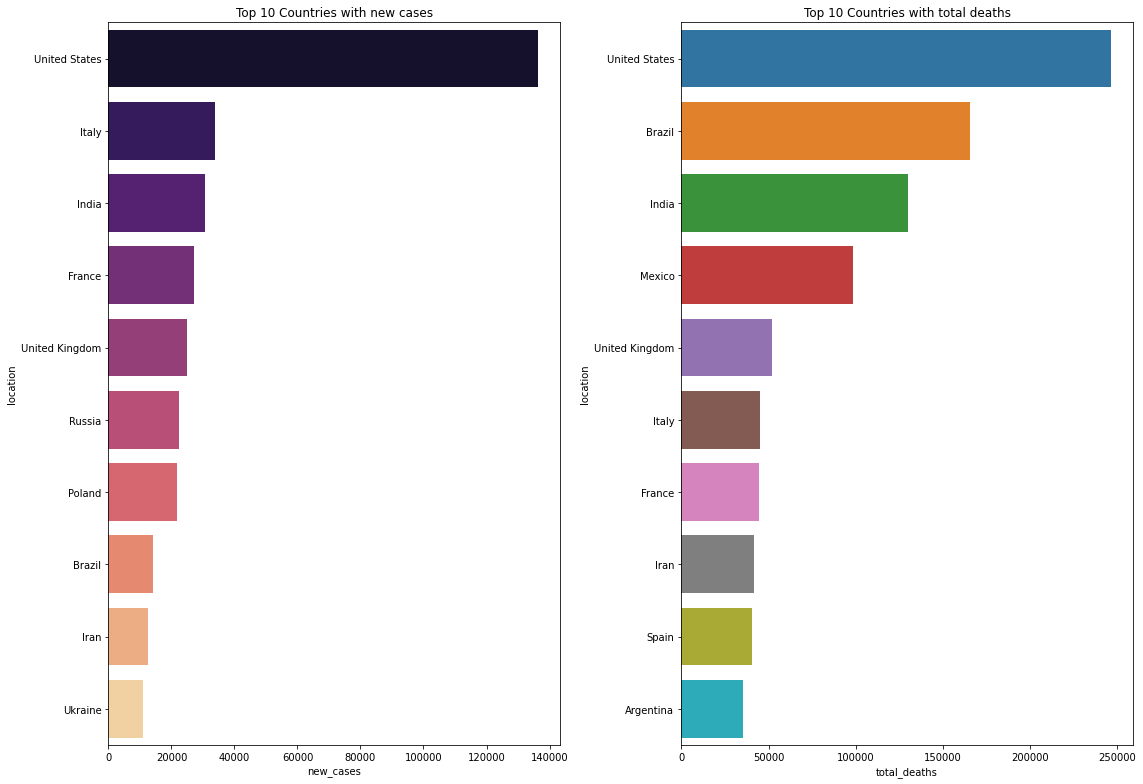

In [ ]:

fig,axes = plt.subplots(figsize=(16,11),nrows =1, ncols = 2)
sns.barplot(x =top_10_countries_by_new_cases["new_cases"][:10], y =top_10_countries_by_new_cases["location"][:10],
           ax = axes[0],palette ="magma", orient = "h");
axes[0].set_title("Top 10 Countries with new cases")
sns.barplot(x = top_10_countries_by_most_deaths["total_deaths"][:10],y = top_10_countries_by_most_deaths["location"][:10],
           ax =axes[1], orient = "h")
axes[1].set_title("Top 10 Countries with total deaths")
fig.tight_layout()

In [ ]:
top_10_countries_by_most_deaths ['location'].tail(10)

29625                                Laos
34080                    Marshall Islands
36009                            Mongolia
44905               Saint Kitts and Nevis
45517    Saint Vincent and the Grenadines
47447                          Seychelles
48848                     Solomon Islands
54054                               Timor
57654                             Vanuatu
57968                             Vatican
Name: location, dtype: object

In [ ]:
data_asia = data[data['continent'] =='Asia']
data_asia = data_asia[~data_asia['location'].isin(['World','International'])]
data_asia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,1110.759,5.266,3.967,41.615,0.308,0.202,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2523,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,39597.615,500.129,526.114,594.958,8.437,9.835,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.755
3520,AZE,Asia,Azerbaijan,2020-11-15,75688.0,2259.0,1468.143,967.0,21.0,18.143,7464.907,222.799,144.799,95.373,2.071,1.789,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,10139175.0,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.757
4149,BHR,Asia,Bahrain,2020-11-15,84703.0,180.0,178.143,334.0,1.0,0.714,49778.941,105.784,104.692,196.288,0.588,0.420,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8805.0,1894421.0,1113.329,5.175,10118.0,5.946,0.018,56.8,units unclear,NaN,NaN,NaN,NaN,NaN,54.63,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.846
4466,BGD,Asia,Bangladesh,2020-11-15,432333.0,1837.0,1727.857,6194.0,21.0,18.143,2625.142,11.154,10.492,37.610,0.128,0.110,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14060.0,2539021.0,15.417,0.085,14085.0,0.086,0.123,8.2,tests performed,NaN,NaN,NaN,NaN,NaN,80.09,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608


In [ ]:

df_asia=data_asia[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
265,2020-11-15,43240.0,205.0,1620.0,NaN,NaN,Afghanistan,0.308,NaN,NaN,NaN,12.0
2523,2020-11-15,117337.0,1482.0,1763.0,NaN,NaN,Armenia,8.437,NaN,NaN,NaN,25.0
3520,2020-11-15,75688.0,2259.0,967.0,NaN,NaN,Azerbaijan,2.071,NaN,NaN,NaN,21.0
4149,2020-11-15,84703.0,180.0,334.0,8805.0,1894421.0,Bahrain,0.588,1113.329,5.175,0.018,1.0
4466,2020-11-15,432333.0,1837.0,6194.0,14060.0,2539021.0,Bangladesh,0.128,15.417,0.085,0.123,21.0
6350,2020-11-15,375.0,0.0,NaN,NaN,NaN,Bhutan,NaN,NaN,NaN,NaN,NaN
7898,2020-11-15,148.0,0.0,3.0,NaN,NaN,Brunei,0.000,NaN,NaN,NaN,0.0
9162,2020-11-15,302.0,0.0,NaN,NaN,NaN,Cambodia,NaN,NaN,NaN,NaN,NaN
11420,2020-11-15,91850.0,22.0,4742.0,NaN,NaN,China,0.000,NaN,NaN,NaN,0.0
20253,2020-11-15,79678.0,3020.0,703.0,NaN,NaN,Georgia,8.523,NaN,NaN,NaN,34.0


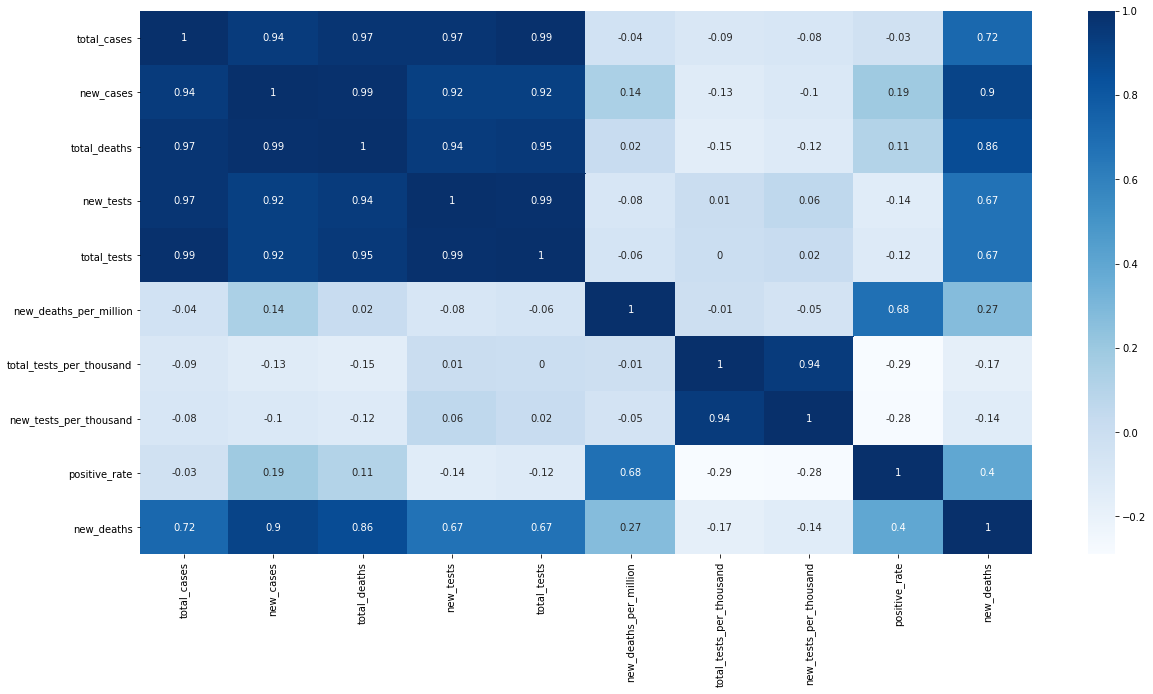

In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(np.round(df_asia.corr(),2),annot= True,cmap='Blues')

In [ ]:
asia_cases = df_asia.sort_values('total_cases',ascending = False)
asia_cases1 = df_asia.sort_values('total_cases',ascending = True)

Text(0.5, 1.0, 'Top 10 Countries(Asia) with most cases')

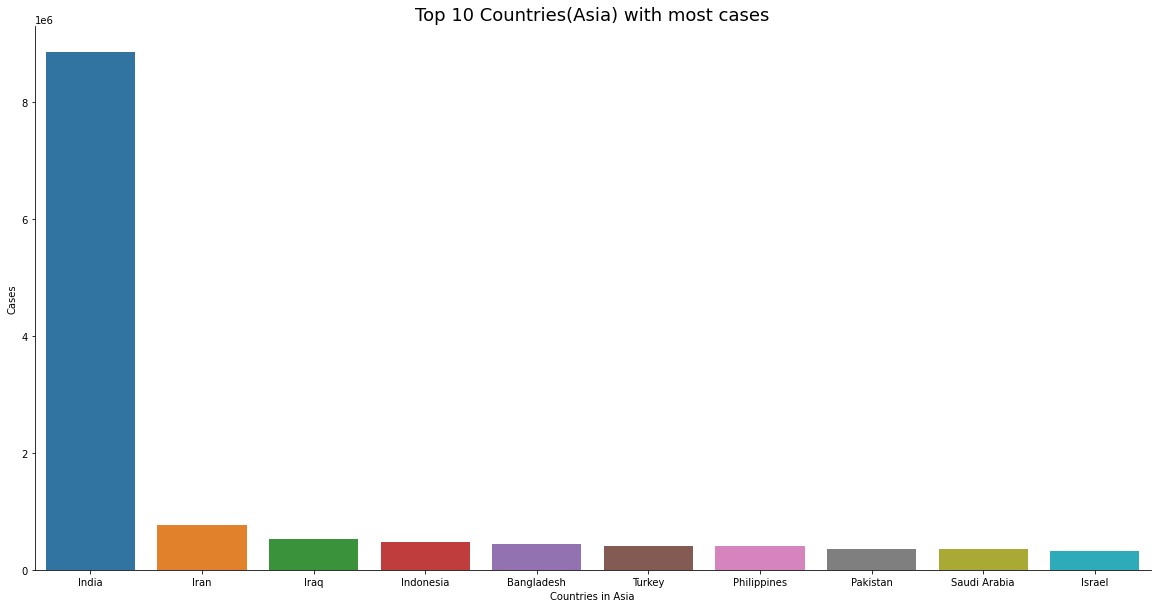

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_cases", data=asia_cases.head(10))
ax.set_ylabel(ylabel = 'Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries in Asia', fontsize = 10)
ax.set_title('Top 10 Countries(Asia) with most cases')

Text(0.5, 1.0, 'Top 10 Countries(Asia) with least cases')

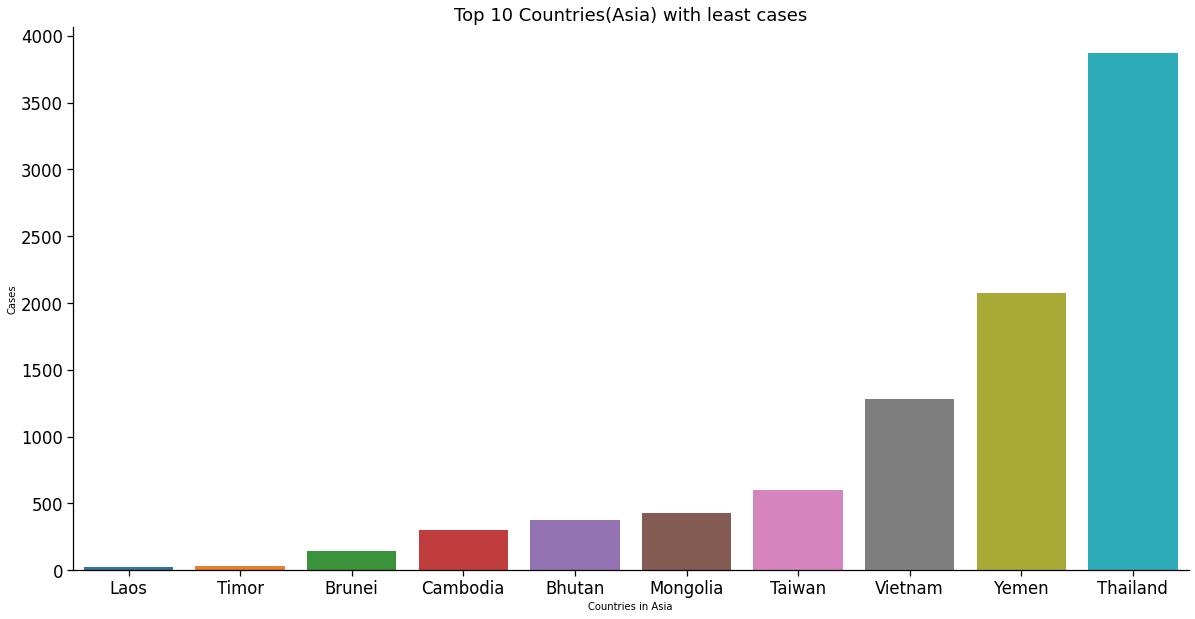

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_cases", data=asia_cases1.head(10))
ax.set_ylabel(ylabel = 'Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries in Asia', fontsize = 10)
ax.set_title('Top 10 Countries(Asia) with least cases')

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

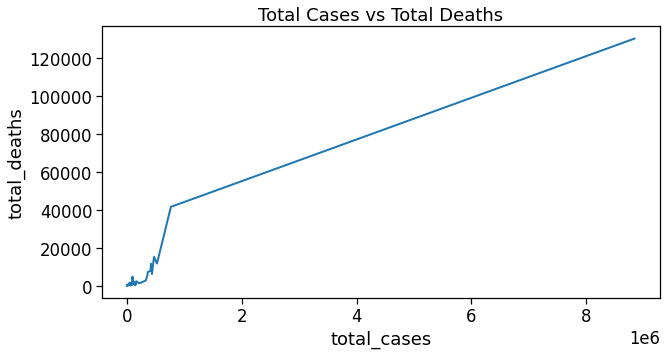

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=df_asia)
plt.title("Total Cases vs Total Deaths")

Text(0.5, 1.0, 'Total Deaths vs New Deaths per million')

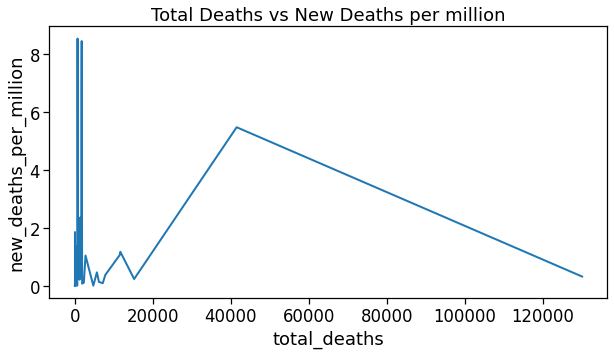

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_deaths',y='new_deaths_per_million',data=df_asia)
plt.title("Total Deaths vs New Deaths per million")

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

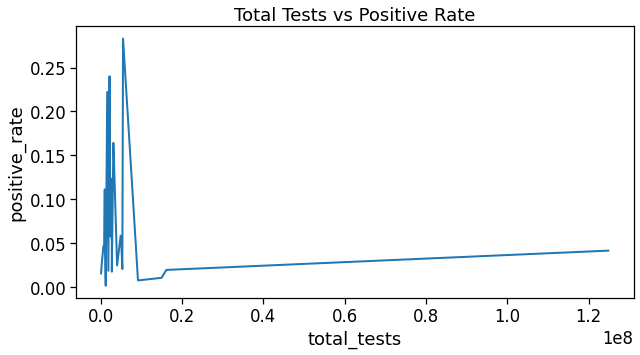

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_tests',y='positive_rate',data=df_asia)
plt.title("Total Tests vs Positive Rate")